In [87]:
import intake
import pandas as pd
import numpy as np

import hvplot.pandas

Row(margin=0)
    [0] Column(margin=(25, 0, 0, 0), width=50)
        [0] PNG(str, align='center')
    [1] Column(max_width=1600, name='GUI', width_policy='max')
        [0] Row(margin=0)
            [0] Column(margin=0)
                [0] Column(margin=0, name='Select Catalog')
                    [0] Markdown(str, max_height=40)
                    [1] MultiSelect(min_width=200, options={'builtin': <Intake catalo...}, size=9, value=[<Intake catalog: d...], width_policy='min')
                [1] Row(margin=0, name='Controls')
                    [0] Toggle(name='＋', width=50)
                    [1] Button(clicks=1, name='―', width=50)
                    [2] Toggle(name='🔍', width=50)
            [1] Column(margin=0)
                [0] Column(margin=0, name='Select Data Source')
                    [0] Markdown(str, max_height=40)
                    [1] MultiSelect(min_width=200, options=OrderedDict([('air_tempera...]), size=9, value=[name: air_temperature C...], width_policy='min')
                [1] Row(margin=0, name='Controls')
                    [0] Toggle(name='📊', width=50)
            [2] Column(height=240, margin=0, name='Description', width_policy='max')
                [0] Markdown(str, max_height=40)
                [1] Str(str, css_classes=['scrolling'], height=200, sizing_mode='stretch_width')
        [1] Row(height_policy='min', margin=0, max_width=1600, name='Search', width_policy='max')
        [2] Column(margin=0, max_width=1600, name='Add Catalog', width_policy='max')
        [3] Column(margin=0, name='Plot', width_policy='max')
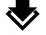

In [88]:
intake.gui

In [25]:
source_entry=intake.gui.sources[0]

In [26]:
data_source = source_entry() 
#data_source = source_entry(csv_kwargs={'header': None, 'skiprows': 1,'sep':"\s+"}) 

In [27]:
df=data_source.read()

In [28]:
try:
    df.MESS_DATUM=df.MESS_DATUM.astype('int64')
    if len(str(df['MESS_DATUM'][0]))==12:
        df["datetime"]=df['MESS_DATUM'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M'))
    if len(str(df['MESS_DATUM'][0]))==10:
        df["datetime"]=df['MESS_DATUM'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H'))
except:
    pass
try:
    df.MESS_DATUM_BEGINN=df.MESS_DATUM_BEGINN.astype('int64')
    if len(str(df['MESS_DATUM_BEGINN'][0]))==8:
        df["datetime"]=df['MESS_DATUM_BEGINN'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
except:
    pass
try:
    df.MESS_DATUM=df.MESS_DATUM.astype('int64')
    if len(str(df['MESS_DATUM'][0]))==8:
        df["datetime"]=df['MESS_DATUM'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
except:
    pass
df.index=df["datetime"]
#df.index=df.file_nr

In [29]:
df.dtypes,df.shape,df.columns

(STATIONS_ID             int64
 MESS_DATUM              int64
 QN_3                  float64
 FX                    float64
 FM                    float64
 QN_4                    int64
 RSK                   float64
 RSKF                  float64
 SDK                   float64
 SHK_TAG               float64
 NM                    float64
 VPM                   float64
 PM                    float64
 TMK                   float64
 UPM                   float64
 TXK                   float64
 TNK                   float64
 TGK                   float64
 eor                    object
 datetime       datetime64[ns]
 dtype: object,
 (42641, 20),
 Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', 'FX', 'FM', 'QN_4', 'RSK', 'RSKF',
        'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'TMK', 'UPM', 'TXK', 'TNK', 'TGK',
        'eor', 'datetime'],
       dtype='object'))

In [30]:
df.head()

STATIONS_ID  MESS_DATUM  QN_3  FX  FM  QN_4  RSK  RSKF  SDK  \
datetime                                                                  
1882-01-01          853    18820101   NaN NaN NaN     1  0.0   1.0  NaN   
1882-01-02          853    18820102   NaN NaN NaN     1  0.0   0.0  NaN   
1882-01-03          853    18820103   NaN NaN NaN     1  1.4   1.0  NaN   
1882-01-04          853    18820104   NaN NaN NaN     1  0.6   1.0  NaN   
1882-01-05          853    18820105   NaN NaN NaN     1  2.6   1.0  NaN   

            SHK_TAG   NM  VPM     PM  TMK   UPM  TXK  TNK  TGK  eor   datetime  
datetime                                                                        
1882-01-01      NaN  3.0  4.1  979.4 -1.5  76.0  2.5 -4.3  NaN  eor 1882-01-01  
1882-01-02      NaN  5.0  5.6  976.2  2.5  78.0  5.3 -4.6  NaN  eor 1882-01-02  
1882-01-03      NaN  7.3  6.7  966.8  7.0  67.0  7.7 -0.7  NaN  eor 1882-01-03  
1882-01-04      NaN  7.7  6.8  973.7  4.0  82.0  7.5  3.0  NaN  eor 1882-01-04  
1882-01-05      NaN  7.7  5.1  978.9  2.9  69.0  4.0  0.6  NaN  eor 1882-01-05

In [14]:
#df.hvplot.line(x="datetime",y="RWS_10")

In [15]:
#df.hvplot.line(x="datetime",y="TT_TU")
#df["cumsum(RWS_10)"]=df["RWS_10"].cumsum()
#df["rolling_week(RWS_10)"]=df["RWS_10"].rolling(6*24*7).sum()

In [31]:
#hv.Area((X, Y, Y2), vdims=['y', 'y2'])
df.hvplot.line("datetime","TMK")*df.hvplot.area("datetime","TNK","TXK",alpha=.3)

:Overlay
   .Curve.I :Curve   [datetime]   (TMK)
   .Area.I  :Area   [datetime]   (TNK,TXK)

In [32]:
df.tail()

STATIONS_ID  MESS_DATUM  QN_3    FX   FM  QN_4  RSK  RSKF    SDK  \
datetime                                                                       
2018-12-27          853    20181227   3.0   7.7  4.3     3  0.0   0.0  3.333   
2018-12-28          853    20181228   3.0   9.0  4.6     3  0.6   6.0  0.000   
2018-12-29          853    20181229   3.0  14.6  6.4     3  9.9   8.0  0.000   
2018-12-30          853    20181230   3.0  20.2  7.5     3  3.0   6.0  0.017   
2018-12-31          853    20181231   3.0   8.6  3.6     3  1.4   6.0  0.000   

            SHK_TAG   NM  VPM      PM  TMK    UPM  TXK  TNK  TGK  eor  \
datetime                                                                
2018-12-27      0.0  7.5  7.6  975.81  4.1  92.54  6.5  2.8  2.0  eor   
2018-12-28      0.0  6.7  6.6  976.14  1.6  95.54  3.0 -0.4 -1.6  eor   
2018-12-29      0.0  7.9  6.8  976.90  2.1  95.54  3.1  1.2  0.4  eor   
2018-12-30      0.0  7.5  7.3  975.11  3.8  90.17  4.8  2.1  1.8  eor   
2018-12-31      0.0  7.6  8.2  980.08  4.4  98.50  5.7  3.0  2.5  eor   

             datetime  
datetime               
2018-12-27 2018-12-27  
2018-12-28 2018-12-28  
2018-12-29 2018-12-29  
2018-12-30 2018-12-30  
2018-12-31 2018-12-31

In [34]:
df.resample("Y").mean().hvplot(x="datetime",y=["TMK"])

:Curve   [datetime]   (TMK)

In [36]:
df.resample("5Y").mean().hvplot(x="datetime",y=["TMK"])

:Curve   [datetime]   (TMK)

In [37]:
df.resample("10Y").mean().hvplot(x="datetime",y=["TMK"])

:Curve   [datetime]   (TMK)

In [68]:
df.TXK.hvplot.hist()

:Histogram   [TXK]   (TXK_count)

In [72]:
df.TXK[df.TXK>20].resample("Y").count().hvplot(x="datetime",label="20") *\
df.TXK[df.TXK>24].resample("2Y").count().hvplot(x="datetime",label="24") *\
df.TXK[df.TXK>28].resample("5Y").count().hvplot(x="datetime",label="28") *\
df.TXK[df.TXK>32].resample("5Y").count().hvplot(x="datetime",label="32")

:Overlay
   .Curve.A_20 :Curve   [datetime]   (TXK)
   .Curve.A_24 :Curve   [datetime]   (TXK)
   .Curve.A_28 :Curve   [datetime]   (TXK)
   .Curve.A_32 :Curve   [datetime]   (TXK)

In [84]:
mask1950_1980 = (df.datetime > '1960-1-1') & (df.datetime <= '1980-1-1')
mask1988_2018 = (df.datetime > '1988-1-1') & (df.datetime <= '2018-1-1')
df[mask1960_1980].TNK.hvplot.kde(label="1950-1980")*df[mask1988_2018].TNK.hvplot.kde(alpha=.5,label="1988-2018")

:Overlay
   .Distribution.A_1950_hyphen_minus_1980 :Distribution   [TNK]   (Density)
   .Distribution.A_1988_hyphen_minus_2018 :Distribution   [TNK]   (Density)

In [85]:
df[mask1960_1980].TMK.hvplot.kde(label="1950-1980")*df[mask1988_2018].TMK.hvplot.kde(alpha=.5,label="1988-2018")

:Overlay
   .Distribution.A_1950_hyphen_minus_1980 :Distribution   [TMK]   (Density)
   .Distribution.A_1988_hyphen_minus_2018 :Distribution   [TMK]   (Density)

In [86]:
df[mask1960_1980].TXK.hvplot.kde(label="1950-1980")*df[mask1988_2018].TXK.hvplot.kde(alpha=.5,label="1988-2018")

:Overlay
   .Distribution.A_1950_hyphen_minus_1980 :Distribution   [TXK]   (Density)
   .Distribution.A_1988_hyphen_minus_2018 :Distribution   [TXK]   (Density)